In [1]:
import tensorflow as tf
print(tf.__version__)

c:\users\vaishnavi\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\vaishnavi\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\vaishnavi\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\user

1.14.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path_to_zip = "C:/Users/Vaishnavi/.keras/datasets/"

PATH = os.path.join(os.path.dirname(path_to_zip), 'male_female')

In [5]:
train_dir = os.path.join(PATH, 'train_data')
validation_dir = os.path.join(PATH, 'validation_data')

In [6]:
train_male_dir = os.path.join(train_dir, 'male')  # directory with our training male pictures
train_female_dir = os.path.join(train_dir, 'female')  # directory with our training female pictures
validation_male_dir = os.path.join(validation_dir, 'male')  # directory with our validation male  pictures
validation_female_dir = os.path.join(validation_dir, 'female')  # directory with our validation female pictures

In [7]:
num_male_tr = len(os.listdir(train_male_dir))
num_female_tr = len(os.listdir(train_female_dir))

num_male_val = len(os.listdir(validation_male_dir))
num_female_val = len(os.listdir(validation_female_dir))

total_train = num_male_tr + num_female_tr
total_val = num_male_val + num_female_val

In [8]:
print('total training male images:', num_male_tr)
print('total training female images:', num_female_tr)

print('total validation male images:', num_male_val)
print('total validation female images:', num_female_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training male images: 120
total training female images: 120
total validation male images: 60
total validation female images: 60
--
Total training images: 240
Total validation images: 120


In [9]:
batch_size = 64
epochs = 15
IMG_HEIGHT = 416
IMG_WIDTH = 416

In [10]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 240 images belonging to 2 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 120 images belonging to 2 classes.


In [13]:
sample_training_images, _ = next(train_data_gen)

In [14]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

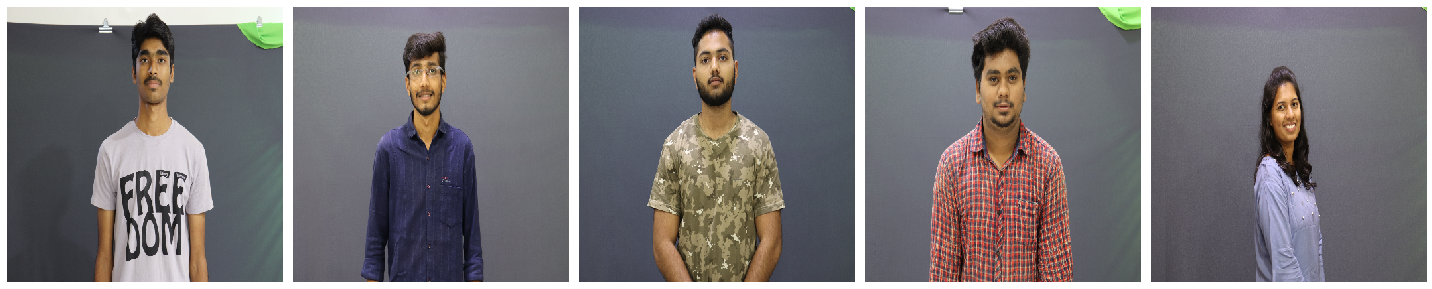

In [15]:
plotImages(sample_training_images[:5])

In [16]:
sample_validation_images, _ = next(val_data_gen)

In [17]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

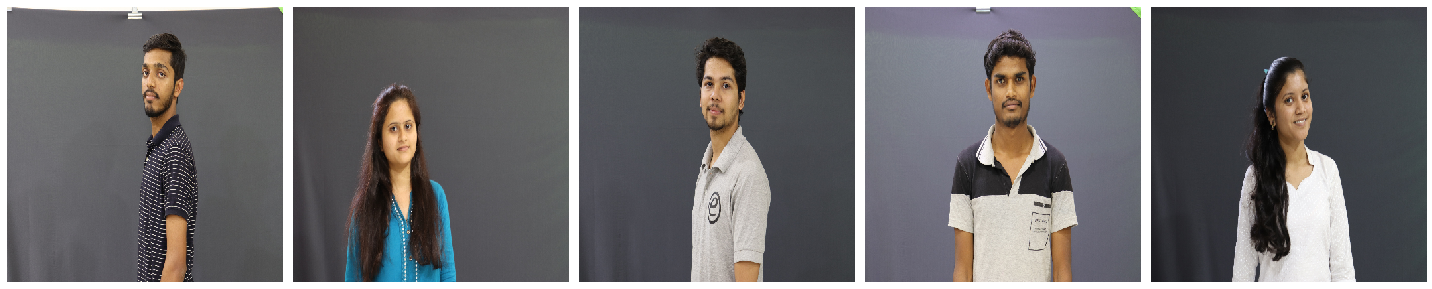

In [18]:
plotImages(sample_validation_images[:5])

In [19]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [21]:
base_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(416,416,3))

In [30]:
x = base_model.output

x = GlobalAveragePooling2D()(x)
#x =  Dropout(0.5)(x)
x=Dense(512,activation='relu')(x) #dense layer 2
#x =  Dropout(0.5)(x)
x=Dense(512,activation='relu')(x) #dense layer 3
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

In [31]:
from tensorflow.keras.models import Model
model = Model(inputs=base_model.input, outputs=predictions)

In [32]:
for layer in base_model.layers:
    layer.trainable=False

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [34]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
3/3 [==============================] - 250s 83s/step - loss: 0.9003 - acc: 0.5455 - val_loss: 0.7683 - val_acc: 0.4688
Epoch 2/15
3/3 [==============================] - 171s 57s/step - loss: 0.7165 - acc: 0.5795 - val_loss: 0.6122 - val_acc: 0.9219
Epoch 3/15
3/3 [==============================] - 174s 58s/step - loss: 0.5828 - acc: 0.8802 - val_loss: 0.5539 - val_acc: 0.8438
Epoch 4/15
3/3 [==============================] - 160s 53s/step - loss: 0.4906 - acc: 0.9375 - val_loss: 0.4674 - val_acc: 0.9219
Epoch 5/15
3/3 [==============================] - 158s 53s/step - loss: 0.4352 - acc: 0.8068 - val_loss: 0.4054 - val_acc: 0.8438
Epoch 6/15
3/3 [==============================] - 168s 56s/step - loss: 0.2915 - acc: 0.9773 - val_loss: 0.3512 - val_acc: 0.8438
Epoch 7/15
3/3 [==============================] - 173s 58s/step - loss: 0.3051 - acc: 0.8750 - val_loss: 0.2976 - val_acc: 0.9219
Epoch 8/15
3/3 [==============================] - 159s 53s/step - loss: 0.2624 - acc: 0.88

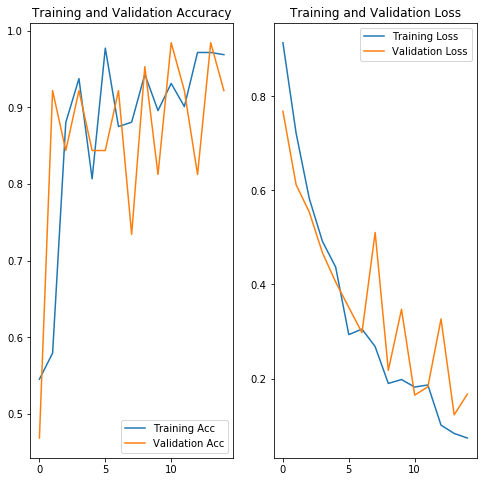

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Acc')
plt.plot(epochs_range, val_acc, label='Validation Acc')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
model.metrics_names

['loss', 'acc']

In [25]:
model.save("gender_classification.h5")

In [26]:
from tensorflow.keras.models import load_model
new_model = load_model("gender_classification.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 207, 207, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 207, 207, 32) 96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 207, 207, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [31]:
img_width, img_height = 416,416

In [32]:
test_image = image.load_img('C:/Users/Vaishnavi/.keras/datasets/male_female/test data/m/IMG_0014.jpg', target_size=(img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [33]:
import cv2

In [34]:
norm_image = cv2.normalize(test_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

In [35]:
result = new_model.predict(norm_image)

In [36]:
print(result[0][0])

0.99556303


In [37]:
if result[0][0] < 0.25:
    print("Girl")
else:
    print("Boy")

Boy


In [38]:
print(result[0][0])

0.99556303


In [39]:
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

In [40]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 120 images belonging to 2 classes.


In [41]:
sample_test_images, _ = next(test_data_gen)

In [42]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

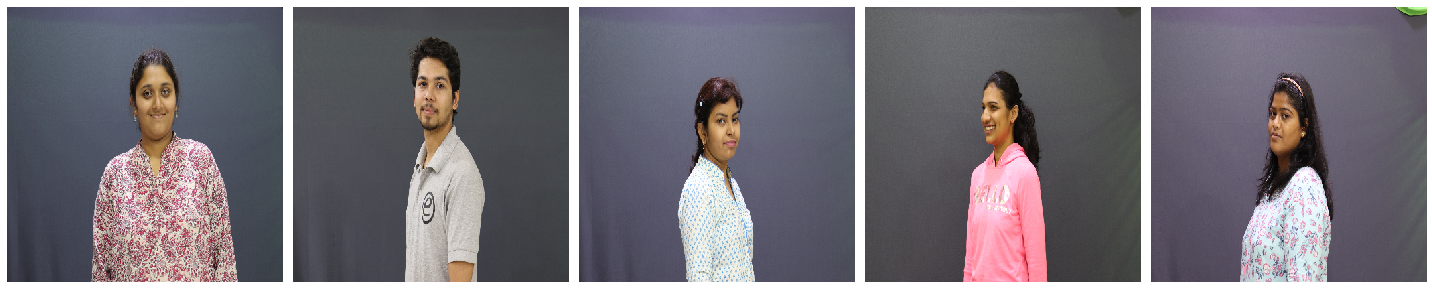

In [43]:
plotImages(sample_test_images[:5])

In [44]:
images = sample_training_images

In [45]:
result = new_model.predict(images)

In [46]:
print(result)

[[0.8750745 ]
 [0.7337194 ]
 [0.45760536]
 [0.09240672]
 [0.560218  ]
 [0.2437849 ]
 [0.20819354]
 [0.46516615]
 [0.21602616]
 [0.9716203 ]
 [0.35010582]
 [0.9491488 ]
 [0.9134893 ]
 [0.04726952]
 [0.04744652]
 [0.98941076]
 [0.6464914 ]
 [0.77720577]
 [0.91932905]
 [0.99689347]
 [0.9813975 ]
 [0.98750526]
 [0.9775091 ]
 [0.4717256 ]
 [0.14980027]
 [0.1256473 ]
 [0.2827487 ]
 [0.7224324 ]
 [0.92519176]
 [0.92715746]
 [0.09537151]
 [0.22120029]
 [0.9811739 ]
 [0.9942225 ]
 [0.72216356]
 [0.20737681]
 [0.15307468]
 [0.8993937 ]
 [0.39091828]
 [0.99689347]
 [0.85535187]
 [0.91414595]
 [0.99671316]
 [0.9662377 ]
 [0.08292532]
 [0.15972805]
 [0.9248964 ]
 [0.8204782 ]
 [0.9988992 ]
 [0.99386793]
 [0.13805825]
 [0.06200072]
 [0.9891132 ]
 [0.6670983 ]
 [0.98917437]
 [0.5975791 ]
 [0.9770746 ]
 [0.23683968]
 [0.97170615]
 [0.9403004 ]
 [0.99494314]
 [0.33910644]
 [0.97825456]
 [0.98895526]]


In [47]:
import cvlib as cv
from cvlib.object_detection import draw_bbox
import imutils

Using TensorFlow backend.


In [48]:
import numpy as np

In [49]:
image = cv2.imread('C:/Users/Vaishnavi/.keras/datasets/male_female/test data/m/IMG_0014.jpg')

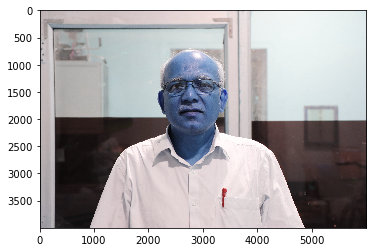

In [50]:
plt.imshow(image)

In [51]:
import matplotlib.pyplot as plt

In [52]:
### Step 1. Detect gender in faces in image.

# Apply face detection
faces, conf = cv.detect_face(image)

In [53]:
# Add a bounding box on faces.
for face in faces:
    (startX,startY) = face[0], face[1]
    (endX, endY) = face[2], face[3]

In [54]:
# Draw rectangle over faces.
    cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 20)

array([[[191, 179, 177],
        [191, 179, 177],
        [192, 180, 178],
        ...,
        [219, 231, 233],
        [220, 232, 234],
        [220, 232, 234]],

       [[191, 179, 177],
        [191, 179, 177],
        [192, 180, 178],
        ...,
        [219, 231, 233],
        [219, 231, 233],
        [219, 231, 233]],

       [[191, 179, 177],
        [191, 179, 177],
        [191, 179, 177],
        ...,
        [218, 230, 232],
        [218, 230, 232],
        [218, 230, 232]],

       ...,

       [[ 53,  59,  64],
        [ 61,  67,  72],
        [ 71,  83,  85],
        ...,
        [ 20,  18,  17],
        [ 20,  18,  17],
        [ 20,  18,  17]],

       [[ 52,  58,  63],
        [ 54,  60,  65],
        [ 64,  76,  78],
        ...,
        [ 20,  18,  17],
        [ 21,  19,  18],
        [ 21,  19,  18]],

       [[ 45,  48,  56],
        [ 52,  58,  65],
        [ 66,  75,  78],
        ...,
        [ 20,  18,  17],
        [ 21,  19,  18],
        [ 22,  20,  19]]

In [55]:
# Loop through detected faces, detect gender.
for face in faces:
    # Store starting and ending X,Y coordinates for detected faces.
    (startX,startY) = face[0], face[1]
    (endX, endY) = face[2], face[3]

In [56]:
# Crop detected faces.
face_crop = np.copy(image[startY:endY, startX:endX])

# Apply gender detection on cropped faces.
(label, confidence) = cv.detect_gender(face_crop)

# Choose most confident label.
ids = np.argmax(confidence)
label = label[ids] 
# Format label.
label = "{}: {:.2f}%".format(label, confidence[ids] * 100)

[INFO] Initializing gender detection model ..


In [57]:
# Set label placement.
    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # Push labels into image.
    cv2.putText(image, label, (startX, Y), cv2.FONT_HERSHEY_DUPLEX, 12.2, (0,0,0), 12)


array([[[191, 179, 177],
        [191, 179, 177],
        [192, 180, 178],
        ...,
        [219, 231, 233],
        [220, 232, 234],
        [220, 232, 234]],

       [[191, 179, 177],
        [191, 179, 177],
        [192, 180, 178],
        ...,
        [219, 231, 233],
        [219, 231, 233],
        [219, 231, 233]],

       [[191, 179, 177],
        [191, 179, 177],
        [191, 179, 177],
        ...,
        [218, 230, 232],
        [218, 230, 232],
        [218, 230, 232]],

       ...,

       [[ 53,  59,  64],
        [ 61,  67,  72],
        [ 71,  83,  85],
        ...,
        [ 20,  18,  17],
        [ 20,  18,  17],
        [ 20,  18,  17]],

       [[ 52,  58,  63],
        [ 54,  60,  65],
        [ 64,  76,  78],
        ...,
        [ 20,  18,  17],
        [ 21,  19,  18],
        [ 21,  19,  18]],

       [[ 45,  48,  56],
        [ 52,  58,  65],
        [ 66,  75,  78],
        ...,
        [ 20,  18,  17],
        [ 21,  19,  18],
        [ 22,  20,  19]]

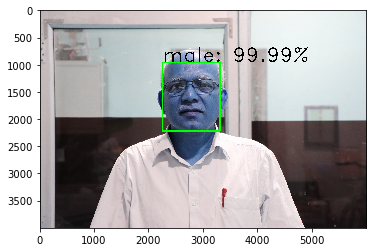

In [58]:
# Show results of face and gender detection, with confidence scores.          
plt.imshow(image)